In [151]:
# importing required libraries and datasets
import pandas as pd
import math
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [152]:
from nltk.lm import MLE

file_path = '/content/drive/MyDrive/raw_reddit_data_filtered.csv'

# Reading the file using pandas
df = pd.read_csv(file_path)

# Print the first 10 comments
print(df.head(10))

   Unnamed: 0  Post_ID Comment_ID  \
0           1  108l3ho    j3vlnat   
1           2  10j6oqj    j5j34zb   
2           3  10j6oqj    j5jbs3f   
3           4  10j6oqj    j5jfczd   
4           5  10o9tvi    j6h1ko8   
5           6  10o9tvi    j88hrgq   
6           7  10o9tvi    jh0junq   
7           8  10o9tvi    j94k8o3   
8           9  10o9tvi    j94kbno   
9          10  10yjhn9    j7yqwxx   

                                             Comment Majority_Sentiment  
0  Some of them yes but this one i got it from my...            Neutral  
1        I keep mine in my phone cover for good luck           Positive  
2  Hang on to it! These are rare to come by as th...            Neutral  
3  Yeah?! Cool, I got this from my classmate in 2...           Positive  
4  Check out the Kaja Throm! Beautiful marketplac...           Positive  
5  Out of curiosity what field of work brings you...           Positive  
6  Definitely Dechenphu Lhakhang/Goenkhang! Seren...           Positive  


In [153]:
import re

# We will do preprocessing by removing links, special characters(all except alphanumeric)
regex_pattern_for_HTTPlinks = r'http[s]?:\S+'
regex_pattern_for_WWWlinks = r'www\S+'
regex_for_removing_hashtags = r'#\S+'
all_characters_expect_alphanumeric = r'[^A-Za-z0-9\s]'

comments = []
processed_comments = []
for _, row in df.iterrows():
  comments += sent_tokenize(row["Comment"])

for comment in comments:
  comment = re.sub(regex_pattern_for_HTTPlinks, '', comment)
  comment = re.sub(regex_pattern_for_WWWlinks, '', comment)
  comment = re.sub(regex_for_removing_hashtags, '', comment)
  comment = re.sub(all_characters_expect_alphanumeric, '', comment)
  comment = comment.lower()
  comment = comment.strip().split(" ")
  if (len(comment) > 0):
    processed_comments.append(comment)

In [154]:
# Set a random seed for reproducibility
np.random.seed(55)
processed_comments = np.array(processed_comments)
# Shuffle the sentences randomly
np.random.shuffle(processed_comments)

# Calculate the index for the split (80% for training)
split_index = int(0.8 * len(processed_comments))

# Split the data into training and testing sets
processed_corpus = list(processed_comments[:split_index])
processed_test = list(processed_comments[split_index:])

<ipython-input-154-c836f18293e6>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  processed_comments = np.array(processed_comments)


In [155]:
processed_corpus[:10]

[['please',
  'great',
  'savior',
  'show',
  'us',
  'ignorant',
  'monkeys',
  'just',
  'how',
  'one',
  'can',
  'resist',
  'the',
  'depredations',
  'of',
  'a',
  'military',
  'regime',
  'which',
  'the',
  'world',
  'has',
  'ignored',
  'for',
  '60',
  'years'],
 ['watching', 'alot', 'of', 'korean', 'reality', 'shows\n\nsubtitled'],
 ['assume',
  'i',
  'am',
  'a',
  'deadbrained',
  'simpleton',
  'but',
  'sincere',
  'who',
  'took',
  'the',
  'picture'],
 ['great',
  'new',
  'purchase',
  'orders',
  'on',
  'the',
  'way',
  'to',
  'military',
  'industrial',
  'complex'],
 ['no', 'not', 'by', 'a', 'far', 'fetch'],
 ['certainly', 'not', 'just', 'india'],
 ['and', 'now', 'were', 'being', 'sold', 'ads', 'based', 'on', 'faith'],
 ['folks',
  'the',
  'equation',
  'is',
  'simple\n\nif',
  'you',
  'mock',
  'someones',
  'religious',
  'belief',
  'or',
  'belittle',
  'their',
  'object',
  'of',
  'devotion',
  'then',
  'you',
  'are',
  'an',
  'asshole'],
 [

Lenght of train and test corpus

In [156]:
print(len(processed_corpus))
print(len(processed_test))

268411
67103


Fucntion for generating n grams within order n

In [157]:
from copy import deepcopy
def everygram_creator(order,processed_corpus):    # function for creating every  ngrams of length <= order

  copy_corpus = deepcopy(processed_corpus)  # creating copy of the dataset so  orginal do

  for i in range(len(copy_corpus)):
    # padding each sentence token according to order

    copy_corpus[i]  =  ["<s>"]*(order-1) + copy_corpus[i] + ["</s>"]*(order-1)

  #  creating n grams
  n_grams = []
  vocab =set()


  for sentence in copy_corpus:
    for token in sentence:
      vocab.add(token)

  for i in copy_corpus :
    grams = []
    for k in range(0,len(i)-order+1):
      window = i[k:k+order]    # creating a window of size == order
      for j in range(1,len(window)+1):
        grams.append(tuple(window[0:j]))  # creating every gram of lenght<= order
    n_grams.append(tuple(grams))

  return tuple(n_grams),vocab  # return a nested tuple containing all n-grams

# An example that how we will create all n grams starting from order 2 on first sentence of the corpus
print("Sentence:", processed_corpus[0:1])
print()
print("All bigrams and unigrams of the sentence-")
print(everygram_creator(2, processed_corpus[:1])[0])

Sentence: [['please', 'great', 'savior', 'show', 'us', 'ignorant', 'monkeys', 'just', 'how', 'one', 'can', 'resist', 'the', 'depredations', 'of', 'a', 'military', 'regime', 'which', 'the', 'world', 'has', 'ignored', 'for', '60', 'years']]

All bigrams and unigrams of the sentence-
((('<s>',), ('<s>', 'please'), ('please',), ('please', 'great'), ('great',), ('great', 'savior'), ('savior',), ('savior', 'show'), ('show',), ('show', 'us'), ('us',), ('us', 'ignorant'), ('ignorant',), ('ignorant', 'monkeys'), ('monkeys',), ('monkeys', 'just'), ('just',), ('just', 'how'), ('how',), ('how', 'one'), ('one',), ('one', 'can'), ('can',), ('can', 'resist'), ('resist',), ('resist', 'the'), ('the',), ('the', 'depredations'), ('depredations',), ('depredations', 'of'), ('of',), ('of', 'a'), ('a',), ('a', 'military'), ('military',), ('military', 'regime'), ('regime',), ('regime', 'which'), ('which',), ('which', 'the'), ('the',), ('the', 'world'), ('world',), ('world', 'has'), ('has',), ('has', 'ignored'

In [158]:
# Creating a dataset for visualizing the trend of average perplexity scores
perplexity_data = {"train_perp_without_LPsmoothing": [],
                   "train_perp_with_LPsmoothing": [],
                   "test_perp_with_LPsmoothing": []}

Average perplexity of a Unigram LM without smoothing on the train dataset

In [159]:
class UnigramModel:

    def __init__(self):
        self.unigram_freq = {}
        self.total_tokens = 0

    def fit(self, processed_corpus):
        for sentence in processed_corpus:
            for token in sentence:
              self.total_tokens += 1
              if token in self.unigram_freq:
                  self.unigram_freq[token] += 1
              else:
                  self.unigram_freq[token] = 1

    def unigram_probability(self, token):
        if token in self.unigram_freq:
            return np.log2(self.unigram_freq[token]) - np.log2(self.total_tokens)
        else:
            return np.log2(0)

    def perplexity(self, processed_test):
        perplexity_values = []
        for sentence in processed_test:
            if len(sentence) > 0:
                sentence_probability = 0.0
                for token in sentence:
                    token_probability = self.unigram_probability(token)
                    sentence_probability += token_probability
                perplexity_values.append(2 ** (-sentence_probability/len(sentence)))

        if len(perplexity_values) > 0:
            return sum(perplexity_values) / len(perplexity_values)


model = UnigramModel()
model.fit(processed_corpus[:])

#Perplexity of unsmoothed unigram on test data
perplexity = model.perplexity(processed_test[:])
print("Average perplexity of a Unigram model on the test dataset:", perplexity)

# Perplexity on train
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Unigram model on the train dataset:", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

<ipython-input-159-e5de3bf0fdb9>:20: RuntimeWarning: divide by zero encountered in log2
  return np.log2(0)


Average perplexity of a Unigram model on the test dataset: inf
Average perplexity of a Unigram model on the train dataset: 14255.955668687251


Unigram with Laplace smoothing

In [160]:
class UnigramSmoothedModel:

    def __init__(self):
      self.unigram_freq = {}
      self.total_tokens = 0
      self.vocab = set()


    def fit(self, processed_corpus):
        for sentence in processed_corpus:
            for token in sentence:
                self.total_tokens += 1
                if token in self.unigram_freq:
                    self.unigram_freq[token] += 1
                else:
                    self.unigram_freq[token] = 1
                    self.vocab.add(token)

    def unigram_probability(self, token):
        if token in self.unigram_freq:
            return np.log2(self.unigram_freq[token]) - np.log2(self.total_tokens)
        else:
            return -np.log2(self.total_tokens + len(self.vocab))

    def perplexity(self, processed_test):
        perplexity_values = []
        for sentence in processed_test:
            if len(sentence) > 0:
                sentence_probability = 0.0
                for token in sentence:
                    token_probability = self.unigram_probability(token)
                    sentence_probability += token_probability
                perplexity_values.append(2 ** (-sentence_probability/len(sentence)))

        if len(perplexity_values) > 0:
            return sum(perplexity_values) / len(perplexity_values)

model = UnigramSmoothedModel()
model.fit(processed_corpus)

perplexity = model.perplexity(processed_test)
print("Average perplexity of a Smoothed Unigram model on the test dataset:", perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of a Smoothed Unigram model on the test dataset: 17603.90109005058


N grams generalized class for bigram, trigram, and quadgram

In [161]:
class ngram():

  def __init__(self, order):
    self.everygram_to_freq = None
    self.unigram_count = 0
    self.vocab = None
    self.order = order

  def fit(self, processed_corpus):

    train, vocab = everygram_creator(self.order, processed_corpus)  # creating n-grams of length <= order
    self.vocab = vocab
    everygram = []
    for i in train:
        everygram.extend(list(i))
    self.everygram_to_freq = {}

    # mapping every n gram to its frequency
    for i in everygram:
      if len(i) == 1:
        self.unigram_count += 1

      if i not in self.everygram_to_freq:
        self.everygram_to_freq[i] = 1
      else:
        self.everygram_to_freq[i] += 1

  def log_prob(self, sentence):

    test,v = everygram_creator(self.order, [sentence])
    grams = []
    for i in test:
      grams.extend(list(i))
    ind = []

    for i in range(len(grams)):
      if len(grams[i]) < self.order:
        ind.append(i)  # storing indices of n grams

    # finding log probability to prevent overflow or underflow error
    log_prob_sen = 0
    for i in range(len(grams)):
      if i in ind:
        continue
      gram = list(grams[i])
      prob_gram = 0
      if tuple(gram) in self.everygram_to_freq:
        if len(gram) >= 2:  # calculating n-gram conditional probability
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)]) - np.log2(self.everygram_to_freq[tuple(gram[0:-1])])
        elif len(gram) == 1:  # counting unigram probability for a unigram
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)]) - np.log2(self.unigram_count)

      else:
        prob_gram = np.log2(0)
      log_prob_sen += prob_gram
    return log_prob_sen


  def perplexity(self, processed_test):
    perplexity_values = []
    for tokens in processed_test:
      n = len(tokens)
      if n >=1:
        score = self.log_prob(tokens)
        score = 2**(-score/n)  # taking antilog to find initial perplexity

        perplexity_values.append(score)

    perplexity = np.mean(perplexity_values) # taking the average of all perplexities
    return perplexity

Average perplexity of a Unigram model on the train dataset(unsmoothed)

In [162]:
model = ngram(1)
model.fit(processed_corpus[:])
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Unigram model on the train dataset(unsmoothed):", perplexity)

Average perplexity of a Unigram model on the train dataset(unsmoothed): 14255.955668686127


Average perplexity of the train dataset for bigram LM(unsmoothed)

In [163]:
model = ngram(2)
model.fit(processed_corpus[:])
perplexity = model.perplexity(processed_corpus[:])
print("Average perplexity of a Bigram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Bigram model on the train dataset(unsmoothed): 3965.5393335785398


Average perplexity of a Trigram model on the train dataset(unsmoothed)

In [164]:
model = ngram(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of a Trigram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Trigram model on the train dataset(unsmoothed): 1834.8439120504106


Average perplexity of a Quadgram model on the train dataset(unsmoothed)

In [165]:
model = ngram(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of a Quadgram model on the train dataset(unsmoothed):", perplexity)
perplexity_data["train_perp_without_LPsmoothing"].append(perplexity)

Average perplexity of a Quadgram model on the train dataset(unsmoothed): 1817.4220713572838


Ideally, when we try to get perplexity scores of these unsmoothed (Uni, Bi, Tri, Quad) Language Models on the test dataset, the scores should approach infinity because:
- These LMs are fitted on the train dataset. Hence, there are many n-grams in the test dataset that do not occur in traina and hence will have probability = 0 according to the LMs.
- This will lead to 0 in denominator of the perplexity formula and perplexity will reach infinity.
- To avoid ''' Division by Zero error''', we give a very less probability (of order e<sup>-25</sup>) to all those n-grams that have a probability = 0.
- Hence, we can see that the perplexity scores are very high(approaching infinity) in the order of e<sup>30</sup> for all unsmoothed LMs just as expected.

Unsmoothed Bigram model on test dataset

In [166]:
model = ngram(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

<ipython-input-161-ec2251a78563>:54: RuntimeWarning: divide by zero encountered in log2
  prob_gram = np.log2(0)


inf


Unsmoothed Trigram model on test dataset

In [167]:
model = ngram(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

<ipython-input-161-ec2251a78563>:54: RuntimeWarning: divide by zero encountered in log2
  prob_gram = np.log2(0)


inf


Unsmoothed Quadgram model on test dataset

In [168]:
model = ngram(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print(perplexity)

<ipython-input-161-ec2251a78563>:54: RuntimeWarning: divide by zero encountered in log2
  prob_gram = np.log2(0)


inf


#Smoothing of N-grams (bigrams, trigrams, quadgram)

In [169]:
class ngram_smoothed():

  def __init__(self, order):
    self.everygram_to_freq = None
    self.unigram_count = 0
    self.vocab = None
    self.order = order

  def fit(self, processed_corpus):

    train, vocab = everygram_creator(self.order, processed_corpus)  # creating n-grams of length <= order
    self.vocab = vocab
    everygram = []
    for i in train:
        everygram.extend(list(i))
    self.everygram_to_freq = {}

    # mapping every n gram to its frequency
    for i in everygram:
      if len(i) == 1:
        self.unigram_count += 1

      if i not in self.everygram_to_freq:
        self.everygram_to_freq[i] = 1
      else:
        self.everygram_to_freq[i] += 1

  def log_prob(self, sentence):

    test,v = everygram_creator(self.order, [sentence])
    grams = []
    # grams = list(test)
    for i in test:
      grams.extend(list(i))
    ind = []

    for i in range(len(grams)):
      if len(grams[i]) == self.order:
        ind.append(i)  # storing indices of n grams

    log_prob_sen = 0
    for i in ind:
      gram = list(grams[i])
      prob_gram = 0
      if tuple(gram) in self.everygram_to_freq:

        if len(gram) >= 2:  # calculating n-gram conditional probability
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)] + 1) - np.log2(self.everygram_to_freq[tuple(gram[0:-1])] + len(self.vocab)-2)

        elif len(gram) == 1:  # counting unigram probability for a unigram
        # Incrementing numerater by 1 and denominator by V = size of the vocabulary
          prob_gram = np.log2(self.everygram_to_freq[tuple(gram)] + 1) - np.log2(self.unigram_count + len(self.vocab))
      else:
        if (len(gram) >= 2):
          if (tuple(gram[0:-1]) in self.everygram_to_freq):
            prob_gram = -np.log2(self.everygram_to_freq[tuple(gram[0:-1])] + len(self.vocab)-2)
          else:
            prob_gram = -np.log2(len(self.vocab)-2)
        else:
          prob_gram = -np.log2(self.unigram_count + len(self.vocab))
      log_prob_sen += prob_gram
    return log_prob_sen


  def perplexity(self, processed_test):
    perplexity_values = []
    for tokens in processed_test:
      n = len(tokens)
      if n >=1:
        score = self.log_prob(tokens)
        score = 2**(-score/n)  # taking antilog to find initial perplexity

        perplexity_values.append(score)

    perplexity = np.mean(perplexity_values) # taking the average of all perplexities
    return perplexity

With smoothing on bigrams

In [170]:
model = ngram_smoothed(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset:", perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset: 75614824.82196411


Smotthing on trigrams

In [171]:
model = ngram_smoothed(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset:",perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset: 6461939256361.122


Smotthing on Quadgrams

In [172]:
model = ngram_smoothed(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_test)
print("Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset:",perplexity)
perplexity_data["test_perp_with_LPsmoothing"].append(perplexity)

Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset: 5.679765033772871e+17


In [173]:
# Smoothed LMs on train data
model = ngram_smoothed(1)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed unigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(2)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(3)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

model = ngram_smoothed(4)
model.fit(processed_corpus)
perplexity = model.perplexity(processed_corpus)
print("Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset:",perplexity)
perplexity_data["train_perp_with_LPsmoothing"].append(perplexity)

print("---------------------------------------------------------")

Average perplexity of test dataset on Laplace smoothed unigram fitted on train dataset: 10218.713166494972
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed bigram fitted on train dataset: 21000540.280605804
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed trigram fitted on train dataset: 874286173256.4287
---------------------------------------------------------
Average perplexity of test dataset on Laplace smoothed quadgram fitted on train dataset: 3.76282568727232e+16
---------------------------------------------------------


Plotting the trend of average perplexity scores on the train dataset on Unsmoothed Language models

In [174]:
perp_df = pd.DataFrame(perplexity_data)
perp_df.index = ["unigram", "bigram", "trigram", "quadgram"]
print(perp_df)

          train_perp_without_LPsmoothing  train_perp_with_LPsmoothing  \
unigram                     14255.955669                 1.021871e+04   
bigram                       3965.539334                 2.100054e+07   
trigram                      1834.843912                 8.742862e+11   
quadgram                     1817.422071                 3.762826e+16   

          test_perp_with_LPsmoothing  
unigram                 1.760390e+04  
bigram                  7.561482e+07  
trigram                 6.461939e+12  
quadgram                5.679765e+17  


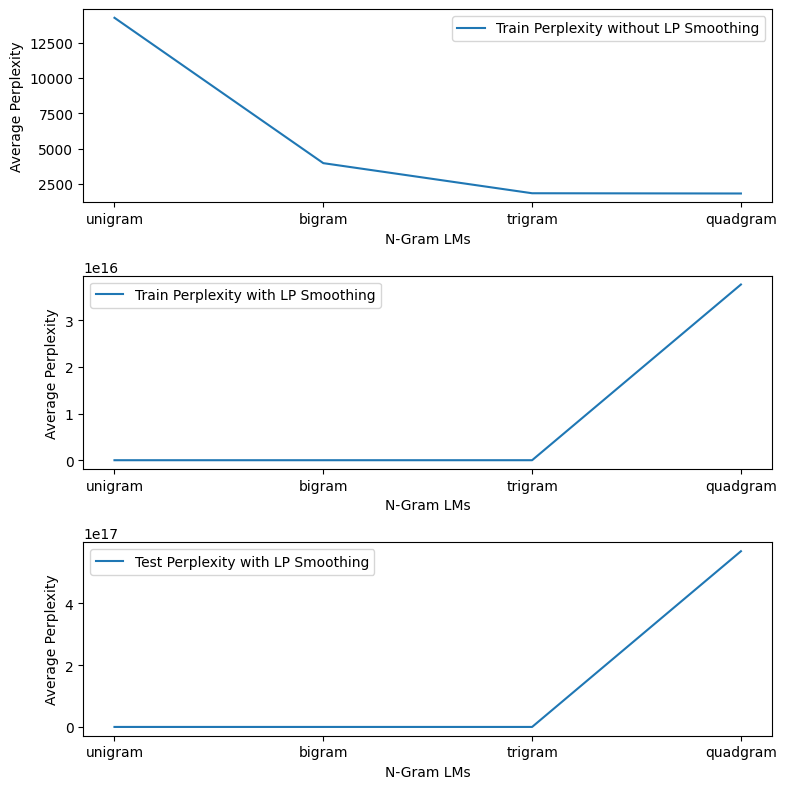

In [175]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))


ax1.plot(perp_df.index, perplexity_data["train_perp_without_LPsmoothing"], label="Train Perplexity without LP Smoothing")
ax1.set_xlabel("N-Gram LMs")
ax1.set_ylabel("Average Perplexity")
ax1.legend()

# Plot train_perp_without_LPsmoothing and train_perp_with_LPsmoothing on another plot
ax2.plot(perp_df.index, perplexity_data["train_perp_with_LPsmoothing"], label="Train Perplexity with LP Smoothing")
ax2.set_xlabel("N-Gram LMs")
ax2.set_ylabel("Average Perplexity")
ax2.legend()

ax3.plot(perp_df.index, perplexity_data["test_perp_with_LPsmoothing"], label="Test Perplexity with LP Smoothing")
ax3.set_xlabel("N-Gram LMs")
ax3.set_ylabel("Average Perplexity")
ax3.legend()

plt.tight_layout()

# Show the plots
plt.show()
